## **K-Nearest Neighbour (KNN)**
* The k-nearest neighbors (KNN) algorithm is a non-parametric, supervised learning algorithm.

* KNN is used for both classification and regression problems.

* KNN uses proximity to compare one data point with a set of data it was trained on and has memorized to make predictions.

* K-Nearest Neighbors (KNN) is often described as a "lazy" learning algorithm, which means it does not explicitly train a model during a training phase. Instead, it stores the entire training dataset and performs computation (finding nearest neighbors) only during prediction. 

### **What is K?**

* In KNN, $K$ is a crucial hyperparameter that determines the number of nearest neighbors to consider when making a prediction.

### **How to measure Distance?**

* In K-Nearest Neighbors (KNN), the distance metric is determines which neighbors are closest to a given data point(query data point).

* Here, distance refers to the how close or how far are two data points i.e. features which could be $n-dimensional$.

* Different distance metrics:

    1. **Euclidean Distance**
        * It measures the straight-line distance between two points in Euclidean space.  
         
        * $d( \mathbf{p}, \mathbf{q}) = \sqrt{\sum_{i=1}^n (p_i - q_i)^2}$

    2. **Manhattan Distance**
        * Also known as L1 distance or city block distance.  

        * It measures the distance between two points by summing the absolute differences of their coordinates.

        * $d(\mathbf{p}, \mathbf{q}) = \sum_{i=1}^n |p_i - q_i|$

    3. **Minkowski Distance**
        * Minkowski distance is a generalization of both Euclidean and Manhattan distances. 

        * It introduces a parameter $p$ that defines the type of distance.

        * $d(\mathbf{p}, \mathbf{q}) = \left( \sum_{i=1}^n |p_i - q_i|^p \right)^{1/p}$

        * For $p=1$, it is equivalent to the Manhattan distance.

        * For $p=2$, it is equivalent to the Euclidean distance.
        
    4. **Hamming distance** 
        * It is used for categorical data and measures the number of positions at which the corresponding elements are different.

        * It is used typically used with Boolean or string vectors.

        * $d(\mathbf{p}, \mathbf{q}) = \sum_{i=1}^n I(p_i \neq q_i)$ where $I$ is an indicator function that equals 1 if $p_i \neq q_i$, and 0 otherwise.


### **KNN Algorithm**

1. Load the data of size $m$ with $n$ features.

2. Choose the number of neighbors $K$.

3. Compute the distance between a query point and the training data using any one type of distance metrics(usually Euclidean distance).

    (Query point is the data point for which KNN needs to predict the result). 
    
    The distance vector, $d$ will be of dimension $m$.

4. Sort the computed distances, $d$ in ascending order.

5. Select the $K$ smallest distances and corresponding data points.

6. Make a prediction.
    * For Classification:
        * Determine the class labels of the $K$ nearest neighbors.
        * Use a majority vote to decide the class of the new data point. 
        * The class with the most votes among the K neighbors is assigned to the new data point.
    * For Regression:
        * Determine the values of the target variable for the K nearest neighbors.
        * Calculate the average (or weighted average) of these values to predict the target value for the new data point.

<div>
    <img src="../assets/knn.png" width=800/>
</div>

### **Choosing $K$**

* **Small K**

    * Pros:
        * More sensitive to the local structure of the data.
        * Can capture finer details in the data.
    * Cons:
        * More susceptible to noise and outliers.
        * Can lead to overfitting, where the model performs well on training data but poorly on unseen data.

* **Large K**

    * Pros:
        * More robust to noise and outliers, as the influence of any single data point is reduced.
        * Can help in achieving smoother decision boundaries.
    * Cons:
        * May overlook local patterns and nuances in the data.
        * Can lead to underfitting, where the model is too generalized and misses important trends in the data.

* Use **cross-validation** to empirically determine the optimal value of K. This involves splitting the training data into multiple subsets, training the model on some subsets, and validating it on the remaining subsets.
* Evaluate the model's performance for different values of K and select the one that gives the best results.
* For classification tasks, it's often recommended to use an odd value for K to avoid ties in voting. 

We will be using sklearn for KNN Algorithm.

In [12]:
# Import libraries
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import seaborn as sns
import matplotlib.pyplot as plt

We will be using clothes size prediction dataset which consists of four features viz. weight, height, age and size. Here, Size is our ground truth.

In [24]:
df = pd.read_csv("../data/cloth_size_prediction.csv")
df.head()

,weight,age,height,size
0,62,28.0,172.72,XL
1,59,36.0,167.64,L
2,61,34.0,165.10,M
3,65,27.0,175.26,L
4,62,45.0,172.72,M


* For easy visualization, we will drop age feature in this tutorial(not recommended in real world case). 
* Also we will focus only on KNN so will  be skipping EDA here which was covered in previous lessons.

In [25]:
df= df.drop(["age"], axis=1)
df.head()

,weight,height,size
0,62,172.72,XL
1,59,167.64,L
2,61,165.10,M
3,65,175.26,L
4,62,172.72,M


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119734 entries, 0 to 119733
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   weight  119734 non-null  int64  
 1   height  119404 non-null  float64
 2   size    119734 non-null  object 
dtypes: float64(1), int64(1), object(1)
memory usage: 2.7+ MB


In [27]:
df.isna().sum()

weight      0
height    330
size        0
dtype: int64

* We will drop all null values for this tutorial.

In [28]:
# Droppoing missing values
df = df.dropna()
df.isna().sum()

weight    0
height    0
size      0
dtype: int64

In [29]:
# Splitting input features and target variable
X = df.drop("size", axis=1).values
y = df["size"].values

* Visualizing the dataset

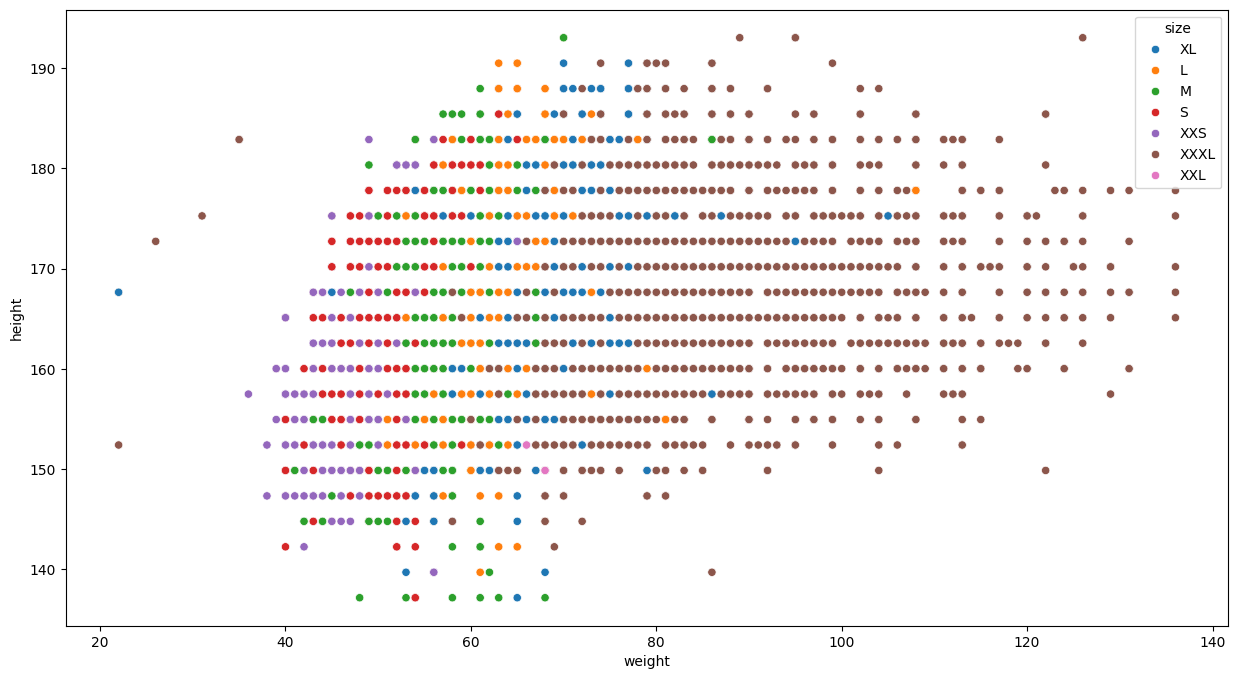

In [30]:
# Scatter plot to visualize the data
plt.figure(figsize=(15, 8))
sns.scatterplot(x="weight", y="height", data=df, hue="size")
plt.show()

* We will be using different set of values for K.
* We will using cross-validation to choose the optimal value for K.

In [39]:
k_values = list(range(1, 30))
cross_val_score_list = []

for k in k_values:
    # Instantiate KNN model
    knn = KNeighborsClassifier(n_neighbors=k, metric="minkowski", p=2)
    
    # Using 10-fold cross validation
    scores = cross_val_score(knn, X, y, cv=10, scoring="accuracy")
    cross_val_score_list.append(scores.mean())
    
print(cross_val_score_list)

[0.39739061763329114, 0.3902047539150123, 0.4147182314722427, 0.4299102917653337, 0.44262351382291804, 0.4418948137948487, 0.4481509661474893, 0.4515176249726987, 0.4546999702754063, 0.46067126801694036, 0.462664433183981, 0.46514351970892065, 0.4652606877729517, 0.46830926468873973, 0.4695822747716754, 0.46992568430742043, 0.471810011731325, 0.47290710594538166, 0.47436439588445534, 0.4766590096730477, 0.4751432181144115, 0.4769605438632742, 0.47750488197344365, 0.47755512832004704, 0.4776054840823328, 0.4771783792647743, 0.480519960857241, 0.4834427882931392, 0.4841463093879918]


* Plotting values of Cross Validation Scores across different values of K

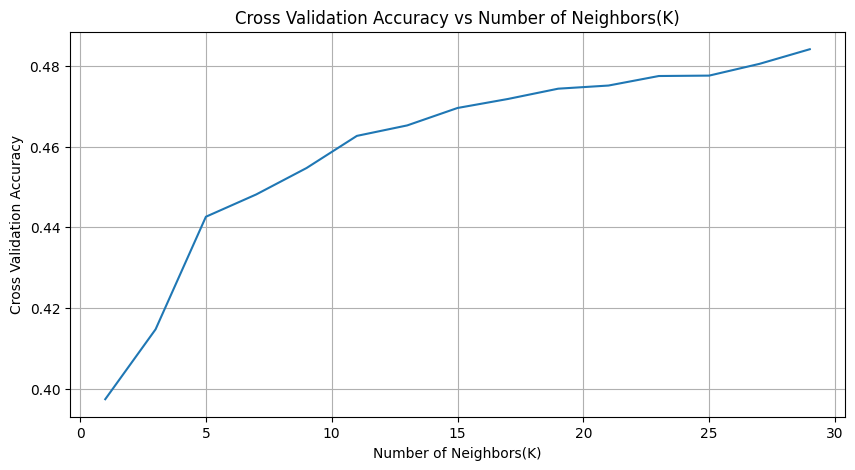

In [37]:
# Plotting accuracy vs number of neighbors
plt.figure(figsize=(10, 5))
sns.lineplot(x=k_values, y=cross_val_score_list)
plt.title("Cross Validation Accuracy vs Number of Neighbors(K)")
plt.xlabel("Number of Neighbors(K)")
plt.ylabel("Cross Validation Accuracy")
plt.grid()
plt.show()

* Prediction using best KNN model

In [42]:
optimal_k = k_values[cross_val_score_list.index(max(cross_val_score_list))]
print("Optimal number of neighbors: ", optimal_k)

# Training the model with the optimal number of neighbors
knn = KNeighborsClassifier(n_neighbors=optimal_k, metric="minkowski", p=2)

# Here training means just storing the training data
knn.fit(X, y)

Optimal number of neighbors:  29


KNeighborsClassifier(n_neighbors=29)

In [43]:
new_data = [[80, 170]]  # 80 kg, 170 cm
knn.predict(new_data)

array(['XXXL'], dtype=object)